In [1]:
# Sidemen "Tinder in Real Life" Data Analysis

In [2]:
# video 1: https://www.youtube.com/watch?v=tDDEiUX38hc&list=PLDVdfKwuzNOIShE6VwRCeEJGk_bviVy2B&index=6

# a "BOP" line means "Based on previous"



In [3]:
import matplotlib
import pandas as pd
# matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
# import pandas as pd
import numpy as np
from datascience import *
plots.style.use('fivethirtyeight')


!pip install textblob      #for installation
import textblob            #to import
from textblob import TextBlob


import re 
import chardet
with open("afinn.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [4]:
import matplotlib
import pandas as pd
# matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
# import pandas as pd
import numpy as np
from datascience import *
plots.style.use('fivethirtyeight')

# DISCLAIMER
### I AM IN NO WAY AFFILIATED WITH THE SIDEMEN BRAND OR YOUTUBE CHANNEL. THIS DATA ANALYSIS WAS DONE ON MY BEHALF STRICTLY FOR ENTERTAINMENT PURPOSES. THIS PROEJCT IS BASED OFF AN  UNCENSORED DATING SHOW, AND THEREFORE CONTAINS OFFENSIVE LANGUAGE. I DO NOT CONDONE OR STAND BY THE OFFENSIVE LANGUAGE USED TOWARDS THE PARTICIPANTS IN THIS SHOW. VIEWER DISCRESSION IS ADVISED. 

### Sidemen Official Disclaimer (From there videos):
"All comments made are a joke and for entertainment/reaction purposes only. We dont advocate talking to women in a disrespectful manner (or anyone for that matter). Not representative of us as people" 

In [5]:
# Use these tutorials to help with these steps bellow: 
# https://www.youtube.com/watch?v=MpF9HENQjDo&list=PL2zq7klxX5ASFejJj80ob9ZAnBHdz5O1t

# PHASE 1: Project Planning

### Phase 1: Project Planning
Come up with an idea:
The sidemen youtube channels most popular videos are the ones in which they recreate a Tinder dating scenario, but in real life. I want to collect and analyze the data on each of the sidemen to see who had the highest right swipes, and who had the least. I want to know which class of pick up lines were the best, and which were the worst. I want to see the distribution of line classes that each of the sidemen used, and which was most successful for each one of them. And finally I would like to use K-nearest neighbors classification in order to input a possible line, and predict whether or not it would of been successful or not. I want also to create good documentation including a github, and entertaining visuals for this project, including photos of the sidemen next to their stats, and all of the potential dates as well. 


### Phase 2: Data Collection
In order to collect the data, I will be creating my own data set. I will be recording all of the swipes left and right, and the lines that the sidemen used. 

### Phase 3: Data Cleaning
I will need to upload all the data into this juypter notebook, and join the tables in some useful manner to work with. 

### Phase 4: Exploratory Data Anlysis
In this phase, I will start to graph the data, and look for intresting relationships within the data. 

### Phase 5: Model Building
Build a K-Nearest neighbor classifier model for pick up lines

### Phase 6: Putting Model Into Production
Try to run algorithm on a different youtube channel that does a similar Dating show. 

### Phase 7: Documentation

# PHASE 2: Data Collection

In [6]:
# line types: Nice, Weird, Random, Flex, BOP (Based off previous), 
# Sexual, Automatic, Joke, Taken, Looks, Compliments

### How the game works:
There is a line of Sidemen, who walk up to the Date and give there line, and the Date can swipe right if they like him or left if they doesnt like him. 

### Data Includes:
Age: an Interger 

Right: A Boolean value

Left: A Boolean Value

Line_Type: A string that classifies the kind of line that was delivered 

Line: A string that is the actual line

# Line Types:
Often there will be some crossover for the different types, but I tried to make clear definitions of each type in order to classify all of the lines. 

### Nice:
A nice line is one that has a humble or honest sentiment. Not overly sexual, or a flex. Not a joke either. 

Nice example: "Hi im Simon, im 26, and im not the most clever and im not the richest" is classified as nice. 

### Weird:
A weird line is a somewhat broad class; however, what makes a line weird is if it is unclear what the person was saying or implying, or if it was a joke with no punchline. Weird lines often left everyone in the room confused. 

Weird Example: "Im JJ im 25 and here to keep you on the black side". This line is classifed as weird because it is somewhere inbetween a joke and sexual, but its not really clear what the reference is, possibly starwars? No one really understands it.

### Random:
A random line is one that is usally a short statement that has no context to the Date or the situation. It isnt really a pickup line, or have anything to do with dating. 

Random Example: "Hi I'm Harry im 22 and I have lost 400 pounds in online poker over the last weekend"

### Flex:
A flex is a line or gesture thats purpose is to flaunt or show off. 

Flex Example: “Hi, Im 25, JJ, and im rich”

### BOP (Based off Previous): 
A based off previous line is a line that is just a follow up to the last line, or building off of someone elses line. 

BOP example: (These two lines proceeded the line above from JJ) 

"My name is Ethan, im 23 and im friends with the rich one" 

"My name is Toby, im 26 and third times the charm, im also friends with the rich one?"

### Sexual:
A sexual line, is one that is overtly sexual and often contains offensive language. 

Sexual Example: “Im Simon Im 26 and my favorite exercise is sex”

### Automatic:
An automatic line is when someone does not get to finish the line before they get swiped.

Automatic Example: “Im Simon Im from North London”

### Joke: 
A joke line is one which has some kind of play on words or takes a classic joke form, and has a silly sentiment. A joke could also be when the person is making fun of themselves. 

Joke Example: “Hi im Josh im 26, and will you be my tinder Ella?”

### Looks/ Compliments:
A looks line is when the person talks about their own looks. A compliment line is one in which they compliment the Dates looks. 

Looks Example: "Hi I'm Toby
I'm 26 and I have a silver tooth”

Compliment Example: "Hi I'm Toby
I'm 26 and I Can speak Spanish, yo pienso que tu eres muy bonita”
Which translates to: "I think you are very pretty"

### Taken:
A taken line is one that implies they are already in a relationship or not intrested. 

Taken Example: “Hi im Josh from 26 i’ve been in a relationship for eight years if you say no I'd appreciate that”

In [7]:
test_table = Table().read_table("tinder_test_table.csv")
test_table

Unnamed: 0,Right,Left,Line_Type,Age,Line
Hazel,nan,nan,nan,28,nan
JJ,nan,1,Flex,25,"“Hi, Im 25, JJ, and im rich”"
Ethan,nan,1,BOP,23,"“My name is Ethan, im 23 and im friends with the rich one”"
Toby,1,nan,BOP,26,"“My name is Toby, im 26 and third times the charm, im al ..."
Simon,1,nan,Random,26,"“Hi im Simon, im 26, and im the only one here that hasn’ ..."
Josh,nan,1,Taken,26,“Hi im Josh from 26 I’ve been in a relationship for eigh ...
Vick,nan,1,Random,23,"Hi my names Vick im 23, and the I was on skype I was giv ..."
Harry,nan,nan,nan,22,nan


In [8]:
type(test_table.column("Left").item(1))

float

In [9]:
def nanfunction(value):
    if value == 1 or value == "1":
        return 1
    else:
        return 0
    
def nanfunction_str(string):
    if type(value) == str:
        return value
    else:
        return 0


def remove_spaces(string):
    string = string.replace(" ", "")
    return string

    
def cleaning_func(table):
# this function is used to fix the nan values 
# in the original csv
# then it removes the 1st row which is the Date
# and prints the Dates name 
# and returns the cleaned up table
    names_array = table.column("Unnamed: 0")
    table = table.with_column("Name", names_array).drop("Unnamed: 0").drop("Age")
    new_right = table.apply(nanfunction, "Right")
    new_left = table.apply(nanfunction, "Left")
    new_line = table.apply(nanfunction, "Line")
    new_table = table.with_columns("Right", new_right, "Left", new_left)
    return new_table

def cleaning_func2(table):
    new_line_types = table.apply(remove_spaces, "Line_Type")
    table = table.with_column("Line_Type",new_line_types)
    new_names = table.apply(remove_spaces, "Name")
    table = table.with_column("Name",new_names)
    new_right = table.apply(nanfunction, "Right")
    new_left = table.apply(nanfunction, "Left")
    new_line = table.apply(nanfunction, "Line")
    new_table = table.with_columns("Right", new_right, "Left", new_left)
    return new_table

In [10]:
all_data = (Table().read_table("Sheet 5-All_Data.csv"))
all_data = cleaning_func2(all_data)
all_data = all_data.group("Name", np.sum)
all_data = all_data.with_column("Total", all_data.column("Right sum") + all_data.column("Left sum"))
all_data = all_data.with_column("Ratio",(all_data.column("Right sum") / all_data.column("Total"))).where("Right sum", are.not_equal_to(0))
all_data = all_data.sort("Ratio", descending=True)
all_data
# we can see bellow that Toby had the best ratio for all of the videos
# and ethan had the worst. 

<ipython-input-10-4be52361ae30>:5: RuntimeWarning: invalid value encountered in true_divide
  all_data = all_data.with_column("Ratio",(all_data.column("Right sum") / all_data.column("Total"))).where("Right sum", are.not_equal_to(0))


Name,Right sum,Left sum,Line_Type sum,Age sum,Line sum,Total,Ratio
Toby,40,26,,,,66,0.606061
Simon,31,35,,,,66,0.469697
Callum,6,7,,,,13,0.461538
Callum2,6,7,,,,13,0.461538
Harry,25,37,,,,62,0.403226
Josh,28,42,,,,70,0.4
Vick,23,43,,,,66,0.348485
JJ,20,46,,,,66,0.30303
Ethan,19,48,,,,67,0.283582
Stephen,2,10,,,,12,0.166667


### Bar Chart of each player and there overall performance

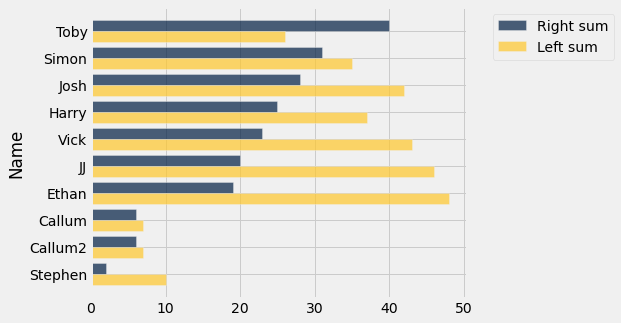

In [11]:
all_data.sort("Right sum",descending=True).barh("Name", ["Right sum", "Left sum"])
# right = worked
# left = failed

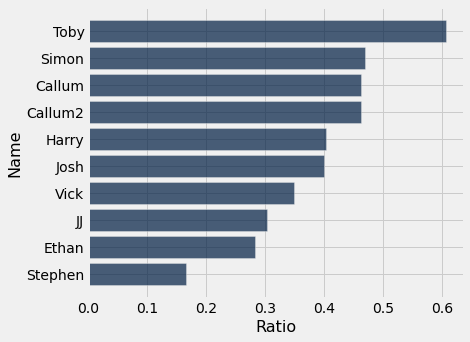

In [12]:
all_data.sort("Ratio",descending=True).barh("Name", "Ratio")

# Toby's Stats


<img src="Toby.png" style="width:120px; height:150px"/>

Toby was the highest performing player. Toby's most commonly used lines  were classifed as Nice or Jokes. 
#### An example of one of Toby's Nice lines was: 
“My name is Toby, im 26 and I would like to take you to see the Northern Lights ”

### Toby's most used Line Types were:
Nice, Jokes, or Random
### Toby's Right to Left Ratio was: 
#### 0.606061.
Toby had 40 right swipes and 26 left swipes. 
He was the only player with a ratio of more rights than lefts.

Toby's Nice lines worked 13/15 times

In [13]:
toby_data = cleaning_func2(Table().read_table("Sheet 5-All_Data.csv"))
toby_data = toby_data.where("Name", "Toby")
toby_data.group("Line_Type").sort("count", descending=True)

Line_Type,count
Nice,15
Joke,11
Random,8
Looks,7
BOP,6
Compliment,6
Flex,6
Sexual,4
Automatic,3


In [14]:
toby_data.where("Line_Type", "Nice").where("Right", 1).num_rows / toby_data.where("Line_Type", "Nice").num_rows

0.8666666666666667

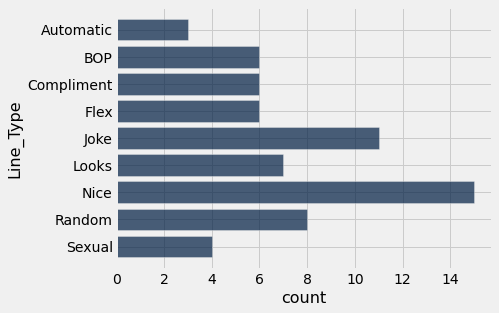

In [15]:
toby_data.group("Line_Type").barh("Line_Type", "count")

In [16]:
toby_data.group("Line_Type").sort("count", descending=True)

Line_Type,count
Nice,15
Joke,11
Random,8
Looks,7
BOP,6
Compliment,6
Flex,6
Sexual,4
Automatic,3


# Ethan's Stats


<img src="Ethan.png" style="width:110px; height:150px"/>

Ethan was the worst performing player who participated in all 4 videos. His most commonly used lines had a sexual sentiment.
#### An example of one of Ethan's Sexual lines was: 
“Im Ethan Im 25 My hands are quite rough like the sex we’re going to have”

### Ethan's most used Line Types were:
Sexual, Jokes, or Flex
### Ethan's Right to Left Ratio was: 
#### 0.283582.
Ethan had 19 right swipes and 48 left swipes. 

Ethans Sexual lines worked 2 / 25 times

In [17]:
# ethan_data.where("Line_Type", "Sexual").column("Line").item(0)

In [18]:
ethan_data = cleaning_func2(Table().read_table("Sheet 5-All_Data.csv"))
ethan_data = ethan_data.where("Name", "Ethan")
ethan_data.group("Line_Type").sort("count", descending=True)

Line_Type,count
Sexual,25
Joke,13
Flex,7
BOP,5
Random,5
Nice,4
Weird,4
Automatic,1
Compliment,1
Looks,1


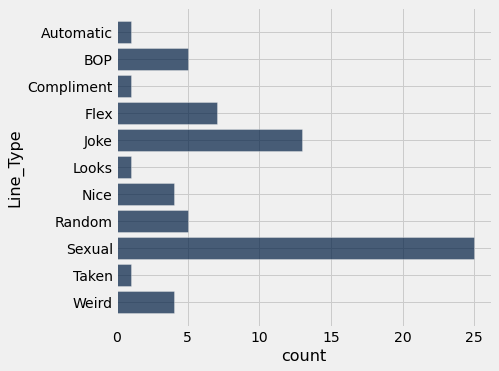

In [19]:
ethan_data.group("Line_Type").barh("Line_Type", "count")

In [20]:
ethan_data.where("Line_Type", "Sexual").where("Right", 1).num_rows / ethan_data.where("Line_Type", "Sexual").num_rows

0.08

In [21]:
# is there any correlation between sexual lines and being rejected? 
# or is this simply due to random chance? 

## Effectiveness of each Line Type:
Bellow is a chart with each line type, the number of right and left swipes, and the ratio of right swipes out of all attempts. This table is sorted from most effective (highest ratio) to least effective. 

In [22]:
effectiveness = cleaning_func2(Table().read_table("Sheet 5-All_Data.csv")).group("Line_Type", np.sum)
effectiveness = effectiveness.where("Left sum", are.above(0)).drop("Name sum")
effectiveness = effectiveness.drop("Age sum", "Line sum")
ratio_array = effectiveness.column("Right sum") / (effectiveness.column("Right sum") + effectiveness.column("Left sum"))
effectiveness = effectiveness.with_column("Ratio" , ratio_array)
effectiveness = effectiveness.sort("Ratio", descending=True)
effectiveness

Line_Type,Right sum,Left sum,Ratio
Nice,28,7,0.8
Compliment,12,8,0.6
BOP,18,13,0.580645
Looks,5,6,0.454545
Joke,55,67,0.45082
Flex,23,33,0.410714
Random,22,32,0.407407
Sexual,31,86,0.264957
Automatic,2,14,0.125
Weird,3,25,0.107143


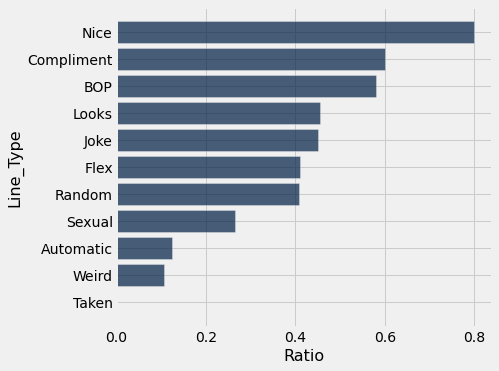

In [23]:
effectiveness.barh("Line_Type","Ratio")

#### Based off Toby's stats, I was curious if Nice Lines really did work more often than Sexual Lines. Also if lines that contained bad words worked worse than those that did not contain bad words.

### Hypothesis Testing:
Do nice lines work more frequently than sexual lines? Or is this due to random chance?
#### Null: The ratio for Nice lines is not greater than for Sexual lines, and any difference is due to random chance.
#### Alt: The ratio for Nice lines is greater than for sexual lines, and that is not due to random chance. 

Observered stat: difference of ratio between nice lines and sexual lines: 0.8 - 0.264957 = 0.535043



In [24]:
left_table = cleaning_func2(Table().read_table("Sheet 5-All_Data.csv")).where("Left", 1).select("Line")
right_table = cleaning_func2(Table().read_table("Sheet 5-All_Data.csv")).where("Right", 1).select("Line")
test_line = left_table.column("Line").item(100)

In [28]:
# if this cell fails run it again
left_table = cleaning_func2(Table().read_table("Sheet 5-All_Data.csv")).where("Left", 1).select("Line")
right_table = cleaning_func2(Table().read_table("Sheet 5-All_Data.csv")).where("Right", 1).select("Line")
test_line = left_table.column("Line").item(100)

def one_test_stat(type1, type2):
# returns one sample statistics which is the difference between ratios
# of Nice lines and Sexual lines.
    sample_table = cleaning_func2(Table().read_table("Sheet 5-All_Data.csv")).sample(with_replacement=True)
    sample_table = sample_table.group("Line_Type", np.sum)
    sample_table = sample_table.where("Left sum", are.above(0)).drop("Name sum")
    sample_table = sample_table.drop("Age sum", "Line sum")
    sample_ratio_array = sample_table.column("Right sum") / (sample_table.column("Right sum") + sample_table.column("Left sum"))
    sample_table = sample_table.with_column("Ratio" , sample_ratio_array)
    sample_table = sample_table.sort("Ratio", descending=True)
    return sample_table.where("Line_Type", type1).column("Ratio").item(0) - sample_table.where("Line_Type", type2).column("Ratio").item(0)

def bootstrap(n, type1, type2):
# returns an array of n test statistics 
    sample_diffs = make_array()
    for i in np.arange(n):
        sample_stat = one_test_stat(type1, type2)
        sample_diffs = np.append(sample_diffs, sample_stat)
    return sample_diffs

sample_stats = bootstrap(1000 , "Nice", "Sexual")
sample_stats_comp = bootstrap(1000 , "Compliment", "Sexual")
# sample_stats


In [29]:
sample_stats

array([0.63138138, 0.54475576, 0.50441422, 0.54487179, 0.61038961,
       0.4640625 , 0.55678509, 0.44057623, 0.57050691, 0.50276559,
       0.51315789, 0.64054637, 0.39876216, 0.63074291, 0.33636364,
       0.33126935, 0.62661123, 0.54871795, 0.45840407, 0.53583916,
       0.57110912, 0.66208477, 0.52342342, 0.4585084 , 0.57764654,
       0.47512755, 0.54754274, 0.52274693, 0.3965287 , 0.61919748,
       0.57179487, 0.6039548 , 0.40367965, 0.54093458, 0.42708333,
       0.49450024, 0.41793699, 0.50877193, 0.58614384, 0.68200549,
       0.58219874, 0.52049808, 0.50555556, 0.51917632, 0.53039927,
       0.54051724, 0.51190476, 0.67921147, 0.46796197, 0.55909091,
       0.57081081, 0.50974771, 0.45843046, 0.62091837, 0.48951049,
       0.62987805, 0.5271786 , 0.49334073, 0.55      , 0.46464646,
       0.44383202, 0.56527218, 0.47086247, 0.64656965, 0.58118584,
       0.47566372, 0.56519397, 0.59471585, 0.58689459, 0.49197861,
       0.39105691, 0.61491525, 0.62950664, 0.52907935, 0.33692

### P-Value:
Under the null hypothesis, if there was no difference between ratios of Nice and Sexual lines, there difference would be 0. To simulate under the null hypothesis I bootstrapped 1000 test stats by resampling with replacement, and none of them were less than or equal to 0. We can reject the Null, and say that the difference in ratios between Nice lines and Sexual Lines is not due to random chance. Therefore it is statistically signifcant that Nice Lines work more effectively than Sexual Lines. 

In [30]:
np.count_nonzero(sample_stats <= 0) / len(sample_stats)

0.0

In [31]:
np.count_nonzero(sample_stats_comp <= 0) / len(sample_stats)

0.003

# KNN
In order to use KNN prediction, I have to assign some numerical values to each line, then use those numerical values to find distance between points to classify.
#### The first numerical value, could be proportion of Bad Words
#### The second numerical value could be the sentiment Score
#### Another one could be length of line 

In [32]:
left_table = cleaning_func2(Table().read_table("Sheet 5-All_Data.csv")).where("Left", 1).select("Line")
right_table = cleaning_func2(Table().read_table("Sheet 5-All_Data.csv")).where("Right", 1).select("Line")
test_line = left_table.column("Line").item(100)

In [33]:
bad_words = Table().read_table("bad-words.csv").column("jigaboo")

In [34]:
sentiment_score_data = pd.read_csv("afinn.csv", encoding = "ISO-8859-1")
sentiment_score_data_words = make_array(sentiment_score_data.iloc[:,1])[0]
sentiment_score_data_scores = make_array(sentiment_score_data.iloc[:,2])[0]
sentiment_scores_table = Table().with_columns("word",sentiment_score_data_words,"score",sentiment_score_data_scores)
sentiment_scores_table.show()

word,score
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
abductions,-2
abhor,-3
abhorred,-3
abhorrent,-3
abhors,-3


In [35]:
# functions for KNN
def bad_words_score(string):
    score = 0
#     print(len(string.split()))
#     print(string.split())
    for word in string.split():
        if word in bad_words:
            score += 1 
    return score * 100


def unique_word_finder(table):
    all_words = make_array()
    array = table.column("Line")
    for word in array:
        word = word.replace('"', "")
        for split in word.split():
            if split not in all_words:
                all_words = np.append(all_words, split)
    return all_words

def contain_word(string):
    if "Rich" in string:
        return True 
    

def split_len(string):
    return len(string.item(0).split()) 



def toke_helper_1(toke_string):
    toke_string = toke_string.split()
    result_string = []
    for i in range(len(toke_string)):
        get_vals = list([val for val in toke_string[i] 
                   if val.isalpha() or val.isnumeric()])
        result_string.append("".join(get_vals))
    return result_string

test1 = "#sofun that party last night was so cool!"
toke_helper_1(test1)



stop_words_data = open("english_stop_words.txt").read().split("\n")
stop_words_data


def remove_stop_words(tweet_list):
    new_list = []
    my_range = len(tweet_list)
    for i in range(my_range):
        if tweet_list[i] not in stop_words_data:
            new_list.append(tweet_list[i])
    return new_list



# max(left_table.apply(bad_words_score, "Line"))

In [36]:
toby_table = (Table().read_table("Sheet 5-All_Data.csv")).where("Name", "Toby").select("Line")
toby_table

toby_scores = toby_table.apply(bad_words_score, "Line")
toby_table = toby_table.with_column("Bad Word", toby_scores)
toby_table

Line,Bad Word
"“My name is Toby, im 26 and third times the charm, im al ...",0
"""hi I'm Toby I'm 26 and I'm five foot eight, but everyon ...",0
"""hi I'm Toby I'm 26 and I have a silver tooth”",0
"""hi I'm Toby I'm 26 and I have size 11 ft, read into tha ...",0
"""hi I'm Toby I'm 26 and I Can speak Spanish, yo pienso q ...",0
"""hi I'm Toby I'm 26 and my clothes always have to match”",0
"""hi I'm Toby I'm 26 and I am the other guy with the Uni ...",0
"“My name is Toby, im 26 and if you messaged me I would h ...",0
“Hi”,0
"“My name is Toby, im 26 and I was born with a six pack * ...",0


In [37]:
ethan_table = (Table().read_table("Sheet 5-All_Data.csv")).where("Name", "Ethan").select("Line")

ethan_scores = ethan_table.apply(bad_words_score, "Line")
ethan_table = ethan_table.with_column("Bad Word", ethan_scores)
ethan_table.sort("Bad Word", descending=True)

Line,Bad Word
"“Hello, My name is Ethan, I’m from London, I’m 24, and ...",200
“Im Ethan Im 25 My hands are quite rough like the sex we ...,100
"“My name is Ethan, im 23 and if you’d like your sexual e ...",100
"“Hello I'm Ethan I'm 24, my cat died, can I play with yo ...",100
"“Hi I’m Ethan, I’m 24 is it possible to make a deposit i ...",100
“Basically Ive got 1.1% Nigerian in me and 7.6% North Af ...,100
"“My names Ethan, I’m 24, and I Im guessing you want to f ...",100
"“Hello, I’m Ethan, I’m 24, and In a world full of diseas ...",100
"“My name is Ethan, im 23 and im friends with the rich one”",0
“Im Ethan Im 25 and I really like red lipstick”,0


In [38]:
ethans_bad_words = 8 / 54
ethans_bad_words

0.14814814814814814

In [39]:
stephen_table = (Table().read_table("Sheet 5-All_Data.csv")).where("Name", "Stephen ")

In [40]:
stephen_table = (Table().read_table("Sheet 5-All_Data.csv")).where("Name", "Stephen ")

stephen_scores = stephen_table.apply(bad_words_score, "Line")
stephen_table = stephen_table.with_column("Bad Word", stephen_scores)
stephen_table.sort("Bad Word", descending=True)

Name,Right,Left,Line_Type,Age,Line,Bad Word
Stephen,1,nan,Sexual,nan,"“Hi, we’re a perfect match because I like being pegged, ...",200
Stephen,nan,1,Sexual,nan,"“Hi I'm Stephen, do you get notified when I upload, beca ...",0
Stephen,nan,1,Sexual,nan,"“Hi I'm Stephen, and you can call me Virgin Wifi, cuz I’ ...",0
Stephen,nan,1,Sexual,nan,"“Hi I'm Stephen, I’m 24, and have you been baking biscui ...",0
Stephen,nan,1,Joke,nan,"“Hi I'm Stephen, I know how to please a lady. In fact th ...",0
Stephen,1,nan,Compliment,nan,"“Hi I'm Stephen, I’m 24, and KSI has a top 10 single, bu ...",0
Stephen,nan,1,Sexual,nan,"“Hi I'm Stephen, and are you a pimple? Because I want to ...",0
Stephen,nan,1,Sexual,nan,"“Hi I'm Stephen, I’m 24, I thought pancake day was yeste ...",0
Stephen,nan,1,Joke,nan,"“Hi, I’m 24, should I give you my best line? Okay, K or ...",0
Stephen,nan,1,Sexual,nan,"“Hi, I’m Stephen, and you know what they say, good thing ...",0


In [41]:
stephen_bad_words = 2 / 11
stephen_bad_words

0.18181818181818182

In [42]:
bad_words_score(test_line)
# len(unique_word_finder(lines))

0

In [43]:
Table().read_table("bad-words.csv")

jigaboo
mound of venus
asslover
s&m
queaf
whitetrash
meatrack
ra8s
pimp
urine
whit


In [44]:
lines = cleaning_func2(Table().read_table("Sheet 5-All_Data.csv")).select("Line")


In [45]:
left_table = cleaning_func2(Table().read_table("Sheet 5-All_Data.csv")).where("Left", 1).select("Line")
left_table

Line
"“Hi, Im 25, JJ, and im rich”"
"“My name is Ethan, im 23 and im friends with the rich one”"
“Hi im Josh from 26 I’ve been in a relationship for eigh ...
"Hi my names Vick im 23, and the I was on skype I was giv ..."
“Im Simon Im from North London”
"""hi I'm Toby I'm 26 and I'm five foot eight, but everyon ..."
“hi I'm Josh im 26 and the guy behind me has Chlamydia”
“Im Ethan Im 25 and I really like red lipstick”
“hi I'm Harry I'm 22 and I cried by myself the other night “
“myself every night hi my name's Vic I'm 25 and if I had ...


In [46]:
# len(left_table.column("Line").item(50).split())
# adding length information to left table
left_table = left_table.with_column("Length",left_table.apply(split_len))
bad_array = left_table.apply(bad_words_score, "Line")
left_table = left_table.with_column("Bad Words",bad_array)

In [47]:
# average length of failed lines
np.average(left_table.column("Length"))

17.451827242524917

In [48]:
right_table = right_table.with_column("Length",right_table.apply(split_len))
right_table

Line,Length
"“My name is Toby, im 26 and third times the charm, im al ...",18
"“Hi im Simon, im 26, and im the only one here that hasn’ ...",16
“Hi my name is Vick I'm 25 and I don't have Chlamydia”,12
“Hi I'm ksi I'm 25 and I'm rich and famous”,10
“a nice mature curry so oh oh hi I'm Josh on 26 and I'll ...,23
“Im Ethan Im 25 and you can be the Bi to my Cep”,13
“Im Simon Im 26 and I let my friends borrow my expensive ...,13
“Im Simon Im 26 and my girlfriend said I had to tell you ...,15
“Im vick im 25 and im one of the few normal people in th ...,15
“Im Ethan Im 23 and my dad went to the shop to never return”,14


In [49]:
# average length of lines that worked
np.average(right_table.column("Length"))

17.325

In [50]:
# adding number of bad words and length to ALL pickup lines
whole_table_with_features = cleaning_func2(Table().read_table("Sheet 5-All_Data.csv")).select("Line","Right","Left")
features_len_array = whole_table_with_features.apply(split_len)
whole_table_with_features = whole_table_with_features.with_column("Length", features_len_array)
features_bad_array = whole_table_with_features.apply(bad_words_score, "Line")
whole_table_with_features = whole_table_with_features.with_column("Bad Words",features_bad_array)
whole_table_with_features



Line,Right,Left,Length,Bad Words
nan,0,0,1,0
"“Hi, Im 25, JJ, and im rich”",0,1,7,0
"“My name is Ethan, im 23 and im friends with the rich one”",0,1,13,0
"“My name is Toby, im 26 and third times the charm, im al ...",1,0,18,0
"“Hi im Simon, im 26, and im the only one here that hasn’ ...",1,0,16,0
“Hi im Josh from 26 I’ve been in a relationship for eigh ...,0,1,20,0
"Hi my names Vick im 23, and the I was on skype I was giv ...",0,1,16,0
nan,0,0,1,0
“Im Simon Im from North London”,0,1,6,0
"""hi I'm Toby I'm 26 and I'm five foot eight, but everyon ...",0,1,17,0


This table below shows all the pickup lines that contained 1 or more bad were effective

In [51]:
whole_table_with_features.where("Bad Words", are.above_or_equal_to(1)).where("Right", 1)

Line,Right,Left,Length,Bad Words
“Hi I'm Harry and I may have a minor drug problem”,1,0,11,100
"“Hi im Harry Im 22, and I dont use toilet paper, I just ...",1,0,21,100
"“Hi I’m Simon I'm 26, smile if you want to have sex with me”",1,0,14,100
"“Hi I'm Josh I’m 26, and I love bad bitches that’s my fu ...",1,0,14,200
"“I’m Harry I'm 22 I wrote you a poem, Your Hair is quite ...",1,0,24,100
“I’m Harry I'm 22 I would like to live a happy and long ...,1,0,23,100
“Basically Ive got 1.1% Nigerian in me and 7.6% North Af ...,1,0,31,100
"“I’m Callum, I’m 27 and I heard that poems go down reall ...",1,0,56,100
"“Hi I'm Harry, umm. Are you from Iraq? Because you need ...",1,0,16,100
"“Hi I’m Callum, I’m 25, and you’ve been in a video with ...",1,0,30,100


This table below shows all the pickup lines that contained 1 or more bad were NOT effective

In [52]:
whole_table_with_features.where("Bad Words", are.above_or_equal_to(1)).where("Right", 0)

Line,Right,Left,Length,Bad Words
“Im Ethan Im 25 My hands are quite rough like the sex we ...,0,1,16,100
“hi I'm Harry I'm 22 and and I tried to wax my own ass a ...,0,1,20,100
“Im JJ im 25 and here to keep you on the black side”,0,1,13,100
“Hello my name is Harry and I get my asshole fingered so ...,0,1,12,100
"“My name is Ethan, im 23 and if you’d like your sexual e ...",0,1,21,100
"“Hi, Im 25, JJ, and go fuck yourself”",0,1,8,100
"“”Hi, My name is Harry, im 22, and I like watching plane ...",0,1,14,100
"“”Hi, My name is Harry, im 22, and I like watching plane ...",0,1,14,100
"“Hi, Im 25, and if I Am a felony, you’d be on death row”",0,1,14,100
"“”Hi, My name is Harry, im 22, and I have shat myself mu ...",0,1,14,100


In [53]:
total_number_of_lines_with_bad_words = len(whole_table_with_features.where("Bad Words", are.above_or_equal_to(1)).column(0))
total_number_of_lines_with_bad_words

62

In [54]:
bad_lines_right = 16
porportion_worked = bad_lines_right / total_number_of_lines_with_bad_words
porportion_worked

0.25806451612903225

Out of the 62 lines that contained bad words, only about 26% of them worked. This begs the question, do lines with bad words actually perform worse, or is this simply due to random chance?

### Another P-Value Analysis 
#### Null: Badwords have no effect on whether the date swiped right, and if badwords were used, and they did not swipe right, that is simply due to random chance.
#### Alt: Badwords do have an effect on whether the date swiped right, and this is not due to random chance

In [55]:
observed_stat_test2 = porportion_worked
# here i want to calculate a test statistic which is the 
# porportion of lines that worked using bad words
def one_test_stat2():
    new_table = whole_table_with_features.sample(with_replacement=True)
    worked = len(new_table.where("Bad Words", are.above_or_equal_to(1)).where("Right", 1).column(0))
    return worked / new_table.where("Bad Words", are.above_or_equal_to(1)).num_rows
    
one_test_stat2() 

0.08333333333333333

In [56]:
test_stats_array2 = make_array()
for i in range(1000):
    test_stat = one_test_stat2()
    test_stats_array2 = np.append(test_stats_array2, test_stat)
    
test_stats_array2

array([0.24590164, 0.31343284, 0.1884058 , 0.30769231, 0.22222222,
       0.24590164, 0.23684211, 0.30188679, 0.33333333, 0.19672131,
       0.21538462, 0.27419355, 0.17567568, 0.30882353, 0.26153846,
       0.28787879, 0.28985507, 0.25      , 0.21875   , 0.2962963 ,
       0.30357143, 0.27272727, 0.29310345, 0.25862069, 0.234375  ,
       0.24      , 0.17808219, 0.27272727, 0.26984127, 0.14492754,
       0.25      , 0.36      , 0.25      , 0.27777778, 0.25      ,
       0.28125   , 0.16071429, 0.20634921, 0.375     , 0.27272727,
       0.34693878, 0.16883117, 0.16071429, 0.26315789, 0.27777778,
       0.22727273, 0.32876712, 0.16666667, 0.20634921, 0.13888889,
       0.32307692, 0.15151515, 0.28571429, 0.33870968, 0.23076923,
       0.26315789, 0.3220339 , 0.25490196, 0.26666667, 0.24444444,
       0.2295082 , 0.28571429, 0.26666667, 0.33333333, 0.25      ,
       0.33333333, 0.29230769, 0.36363636, 0.26785714, 0.23529412,
       0.25806452, 0.24324324, 0.28571429, 0.26506024, 0.26666

If using bad words had no effect on the efacacy of pickup lines, than we would have a substantial number of simulations where the test stat is >= .5

#### P-Value

In [57]:
np.count_nonzero(test_stats_array2 >= .5) / len(test_stats_array2)

0.0

#### Test conclusion:
In 1000 simulations, there was never a simulation where the pickup lines with badwords perfrormed equally or better than those without bad words. Therefore we can say that there is an association with the use of bad words and efecacy of lines

Allthough the use of badwords is a good indicator on the efecacy of pickup lines, bad words are only used in a small percentage of pickup lines, so this will not represent the data, so I will add a sentiment score to each line also. However, because bad words do have such an effect on the efacacy, I will weight the badwords heavier than overall sentiment. 

In [58]:
# This code below is here to format and color my KNN scatter plots

color_table = Table().with_columns(
    'Right', make_array(1, 0),
    'Color', make_array('darkblue', 'gold')
)
color_table
whole_table_with_features = whole_table_with_features.join('Right', color_table)
# whole_table_with_features.scatter('Length', 'Bad Words', group='Color')

# blue represents left or 0
# gold represents right  or 1

In [59]:
# I want to add some sentiment analysis, to generate another 
# numerical variable, to find more variance between lines
# I want to calculate a sentiment analysis, then multiply
# it by 0.1 or 0.01 and add it to the bad word score
# this will give us a more information numerical variable
# to use for KNN

In [60]:
# sentiment_score_data = pd.read_csv("afinn.csv", encoding = "ISO-8859-1")
# sentiment_score_data_words = make_array(sentiment_score_data.iloc[:,1])[0]
# sentiment_score_data_scores = make_array(sentiment_score_data.iloc[:,2])[0]
# sentiment_scores_table = Table().with_columns("word",sentiment_score_data_words,"score",sentiment_score_data_scores)
# sentiment_scores_table.show()

In [61]:
def line_score(line):
    weight_1 = 10
    weight_2 = 100
#     bad_words = bad_words_score(line)
    blob_polarity = (TextBlob(line).sentiment.polarity) * weight_2
    blob_subject = (TextBlob(line).sentiment.subjectivity) * weight_1
    sentiment_words = sentiment_scores_table.column("word")
    score = 0
    line = line.split()
    for i in range(len(line)):
        if line[i] in sentiment_words:
            score += sentiment_scores_table.where("word", are.equal_to(line[i])).column("score").item(0) 
    return (score) + blob_polarity + blob_subject 


In [62]:
sentiment_array =  whole_table_with_features.apply(line_score, "Line")
whole_table_with_features = whole_table_with_features.with_column("Sentiment",sentiment_array)
score_array = whole_table_with_features.column("Bad Words") + whole_table_with_features.column("Sentiment")
whole_table_with_features = whole_table_with_features.with_column("Score",score_array)
whole_table_with_features = whole_table_with_features.where("Length", are.above(1))
whole_table_with_features

Right,Line,Left,Length,Bad Words,Color,Sentiment,Score
0,"“Hi, Im 25, JJ, and im rich”",1,7,0,gold,45,45
0,"“My name is Ethan, im 23 and im friends with the rich one”",1,13,0,gold,47,47
0,“Hi im Josh from 26 I’ve been in a relationship for eigh ...,1,20,0,gold,1,1
0,"Hi my names Vick im 23, and the I was on skype I was giv ...",1,16,0,gold,0,0
0,“Im Simon Im from North London”,1,6,0,gold,0,0
0,"""hi I'm Toby I'm 26 and I'm five foot eight, but everyon ...",1,17,0,gold,-5.70833,-5.70833
0,“hi I'm Josh im 26 and the guy behind me has Chlamydia”,1,12,0,gold,-33,-33
0,“Im Ethan Im 25 and I really like red lipstick”,1,10,0,gold,13,13
0,“hi I'm Harry I'm 22 and I cried by myself the other night “,1,14,0,gold,-10.75,-10.75
0,“myself every night hi my name's Vic I'm 25 and if I had ...,1,25,0,gold,2,2


In [63]:
knn_table = whole_table_with_features.select("Length", "Score", "Right")

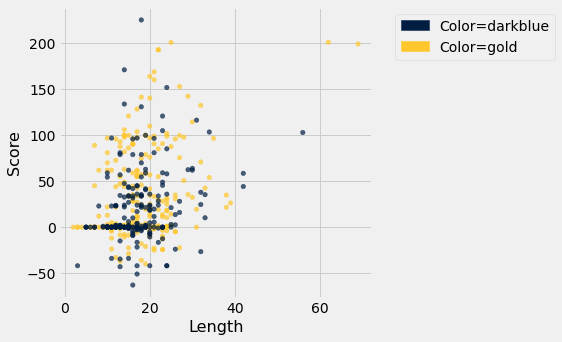

In [64]:
whole_table_with_features.scatter('Length', 'Score', group='Color')
# this scatter is looking more usefull that previous! 
# might add another numerical value in order to get even more 
# accuracy because there are allot of points clustered 
# along the line of zero
# now I want to build a classifier function that can be applied to a 
# pickupline, and return its prediction 

In [65]:
# percent of numbers with a score of 0
knn_table.where("Score", 0).num_rows / knn_table.num_rows

0.29065040650406504

In [66]:
test_line_1 = whole_table_with_features.column("Line").item(100)

In [67]:
TextBlob(test_line_1).sentiment.subjectivity

0.3

In [68]:
test_line_1

'Hi my names Vick I’m 23, and im a number one best selling author”'

In [69]:
line_score(test_line_1)

106.0

In [70]:
knn_table = whole_table_with_features.select("Length", "Score", "Right")

In [71]:
def distance_func(x1, y1):
    return lambda x2, y2: np.sqrt((x1 - x2) **2 + (y1 - y2)**2)

In [72]:
# I chose arbritrary vallues to try to predict bellow
# now I want to build a function that will take two 
# arrays of x and y values, and predict a whole table
# I,ll start by writing a func that does this just for 
# a single pair of values. 

In [73]:
# distance_array = knn_table.apply(d_func, "Length", "Score")
# knn_table_with_d = knn_table.with_column("Distance", distance_array)
# knn_table_with_d.sort("Length")

In [74]:
# knn_table

In [75]:
def predict_a_line(line, table, k):
    x = len(line.split()) 
#     print(line.split())
#     print(x)
    y = line_score(line) + bad_words_score(line) 
#     print(y)
    df = distance_func(x, y)
    distance_array = table.apply(df, "Length", "Score")
    table_with_distance = table.with_column("Distance",distance_array)
#     print(table_with_distance)
    nearest_neighbors = table_with_distance.sort("Distance").take(np.arange(k))
#     print(nearest_neighbors)
    nearest_neighbors = nearest_neighbors.group("Right")
#     print(nearest_neighbors)
    result = nearest_neighbors.sort("count", descending=True).column("Right").item(0)
    return result
    
    

In [76]:
def result_func(line):
    if predict_a_line(line , knn_table, 23):
        return "Yes, the line worked!"
    else:
        return "No, the line failed"
result_func("Hey, are you Jessica Parker, Because I could make our lives like a movie")

'No, the line failed'

In [77]:
# percent of table that has a score of 0

In [78]:
# knn_table.where("Length", 15)

In [79]:
# Because over 50% of the Lines have a score of 0
# this classifier is not too succseful because 
# of the clustering around 0. That means
# I need to add another numerical factor to create
# more difference inbetween all the lines

#  I was able to get this from 50% to 30% by adding polarity!!


In [80]:
# now lets make a training and test set to see the effectiveness 
# of the current algorithm and weights

In [81]:
knn_train = whole_table_with_features.sort("Length").take(np.arange(350)).select("Length", "Score", "Right")
knn_test = whole_table_with_features.sort("Length").take(np.arange(350, 492))
knn_test.column("Line").item(0)

'“Hey I’m Vick, I’m 24, and I’m wearing a cool ass bucket hat form sidemen clothing. Would you like one.”'

In [82]:
knn_train

Length,Score,Right
2,0,0
3,0,0
3,0,0
3,-42,1
4,0,0
5,0,1
5,0,1
5,0,1
6,0,0
6,0,0


In [83]:
def predict_array_func(line):
    k = int(np.round(np.sqrt(knn_test.num_rows)))
    result = predict_a_line(line,knn_train,k)
    return result
predictions_array = knn_test.apply(predict_array_func, "Line")
knn_result = knn_test.with_column("Prediction", predictions_array)
accuracy = np.count_nonzero(knn_result.column("Right") == knn_result.column("Prediction")) / knn_result.num_rows
accuracy



0.6126760563380281

In [84]:
# Not very acurate! Slightly more accurate than just guessing. 
# I should mess with the weights to try to improve the accuracy
# I got it from 57 to 64% which is pretty good improvement.
# now I can do some analysis on the lines that were predicted 
# wrong in order to change the weights on my score value

In [85]:
result_func("I'm writing my final paper on the finer things in life, and I was wondering if I could interview you.")

'No, the line failed'

### Take away from KNN Model:
I was able to make a KNN model that had about 63% accuracy when predicting if pick up lines worked. If I wanted to improve this more I have a few ideas on how to create higher accuracy. In the data collecting phase, I should have collected the length of the pick up line in seconds. There could be a correlation with effectiveness of a line that has to do with how much time it took to deliver. Using this time data I could also calculate the words per minute in which the person was talking, which could also effect whether or not the line worked. I could also find words within the lines such as "um", "like", or "you know" which could identify how clearly and direct someone was speaking, which could also effect if the line worked or not. Finally I could diverge from natural language processing, and delve into the world of sound. If I recorded the audio, and analyzed the points where pitch changes, or the volume at which they were speaking, that could also be a factor.

documentaion: 
https://www.kaggle.com/nicapotato/bad-bad-words

In [86]:
# further improvement to model: create similar table used in movie genre prediction 
# another intresting Idea: use a text generation nueral network API based off this data
# to create random pick up lines, then run them on the algorithm to see which ones would work or not

In [87]:
import nltk

In [88]:
all_lines_strings

NameError: name 'all_lines_strings' is not defined

In [94]:
all_lines_strings = lines.where("Line", are.not_equal_to("nan")).column("Line")
string_all_data = " "

for i in np.arange(len(all_lines_strings)):
    string_all_data = string_all_data + all_lines_strings.item(i) + " "
    
string_all_data

' “Hi, Im 25, JJ, and im rich” “My name is Ethan, im 23 and im friends with the rich one” “My name is Toby, im 26 and third times the charm, im also friends with the rich one?” “Hi im Simon, im 26, and im the only one here that hasn’t had a STD” “Hi im Josh from 26 I’ve been in a relationship for eight years if you say no I\'d appreciate that” Hi my names Vick im 23, and the I was on skype I was giving blood” “Im Simon Im from North London” "hi I\'m Toby\nI\'m 26 and I\'m five foot eight, but\neveryone\'s the same hieght lying down” “hi I\'m\nJosh im 26 and the guy behind me has\nChlamydia”  “Hi my name is Vick I\'m 25 and I don\'t have\nChlamydia” “Im Ethan Im 25 and I\nreally like red lipstick” “Hi I\'m ksi I\'m\n25 and I\'m rich and famous” “hi I\'m Harry I\'m 22 and I cried by\nmyself the other night “ “myself every night hi my name\'s Vic I\'m\n25 and if I had to describe myself I\'d\nSay im quite a lot like a vindaloo” “a nice mature curry so oh oh hi I\'m Josh\non 26 and I\'ll l

In [95]:
string_all_data

' “Hi, Im 25, JJ, and im rich” “My name is Ethan, im 23 and im friends with the rich one” “My name is Toby, im 26 and third times the charm, im also friends with the rich one?” “Hi im Simon, im 26, and im the only one here that hasn’t had a STD” “Hi im Josh from 26 I’ve been in a relationship for eight years if you say no I\'d appreciate that” Hi my names Vick im 23, and the I was on skype I was giving blood” “Im Simon Im from North London” "hi I\'m Toby\nI\'m 26 and I\'m five foot eight, but\neveryone\'s the same hieght lying down” “hi I\'m\nJosh im 26 and the guy behind me has\nChlamydia”  “Hi my name is Vick I\'m 25 and I don\'t have\nChlamydia” “Im Ethan Im 25 and I\nreally like red lipstick” “Hi I\'m ksi I\'m\n25 and I\'m rich and famous” “hi I\'m Harry I\'m 22 and I cried by\nmyself the other night “ “myself every night hi my name\'s Vic I\'m\n25 and if I had to describe myself I\'d\nSay im quite a lot like a vindaloo” “a nice mature curry so oh oh hi I\'m Josh\non 26 and I\'ll l

In [96]:
# First Word tokenization
nltk_tokens_pickup_lines = nltk.word_tokenize(string_all_data)

# Applying Set
no_order_pick_up_lines = list(set(nltk_tokens_pickup_lines))

print(no_order_pick_up_lines)

['watched', 'worth', 'Whites', 'traveling', 'Why', 'use', 'drums', 'order', 'thought', 'Twinkle', 'chicks', 'snake', 'Gib.', 'end', 'didnt', 'interview', 'wheel', 'daises', 'have', 'biscuits', '6', 'hands', 'interaction', 'thing', 'pretty', 'her.', 'uploaded', 'place', 'women', '17', 'showered', 'witch', 'faker', 'life', 'pay', 'famous', 'GCSE', 'chicken.', 'really', 'her', 'than', 'stoke', 'runs', 'she', 'X', 'prepared', 'money', 'eres', 'Yo', 'bring', 'freezer', '35', 'blue', 'Unicycle', 'm.…', 'dream', 'between', 'look', 'chop', 'well.', 'ups', 'African', 'remind', '!', 'documentaries', 'murder', 'six', '’', 'asking', 'poems', 'cool', 'Brown', 'Japan', 'song', '3', 'Im', 'apple', 'currently', 'fine.', 'don', 'tried', 'half', 'bell', 'Ollie', 'person', 'Cep', 'class', 'Messi', 'me.', 'K', 'Sim', 'cause', 'Wakanda', 'job', 'careful', 'Ive', 'i', 'car.', 'spell', 'dying', 'corona', 'run', 'gram.', 'videos', 'tonsillitis', 'smile', 'friend', 'means', 'shoe', 'be', 'Ross', 'piano', 'one.

In [97]:
len(no_order_pick_up_lines)

1579

In [98]:
pickup_lines_list = whole_table_with_features.column("Line")

In [99]:
# I have to remove the "" from all my strings probably

In [100]:
import string
for i in range(len(pickup_lines_list)):
    print(pickup_lines_list[i])
    pickup_lines_list[i] = pickup_lines_list[i].replace('“', "").replace("”", "")
    print(pickup_lines_list[i])
    


“Hi, Im 25, JJ, and im rich”
Hi, Im 25, JJ, and im rich
“My name is Ethan, im 23 and im friends with the rich one”
My name is Ethan, im 23 and im friends with the rich one
“Hi im Josh from 26 I’ve been in a relationship for eight years if you say no I'd appreciate that”
Hi im Josh from 26 I’ve been in a relationship for eight years if you say no I'd appreciate that
Hi my names Vick im 23, and the I was on skype I was giving blood”
Hi my names Vick im 23, and the I was on skype I was giving blood
“Im Simon Im from North London”
Im Simon Im from North London
"hi I'm Toby
I'm 26 and I'm five foot eight, but
everyone's the same hieght lying down”
"hi I'm Toby
I'm 26 and I'm five foot eight, but
everyone's the same hieght lying down
“hi I'm
Josh im 26 and the guy behind me has
Chlamydia” 
hi I'm
Josh im 26 and the guy behind me has
Chlamydia 
“Im Ethan Im 25 and I
really like red lipstick”
Im Ethan Im 25 and I
really like red lipstick
“hi I'm Harry I'm 22 and I cried by
myself the other nig

In [101]:
df_list = [ ]
for pickup_line in pickup_lines_list:
    for word in no_order_pick_up_lines:
        if word not in pickup_line:
            freq = 0
        else:
            dict =  nltk.FreqDist(nltk.tokenize.word_tokenize(pickup_line))
            freq = dict[word]
        df_list += [word, freq]

df = pd.DataFrame(df_list) 
df

,0
0,watched
1,0
2,worth
3,0
4,Whites
...,...
1553731,0
1553732,damn
1553733,0
1553734,third
